# 09 Eye-Tracking Statistical Analysis (R)

## Overview
This notebook performs statistical analysis of eye-tracking data using R for linear mixed-effects modeling.

**Purpose:**
- Statistical testing of eye-tracking metrics across alignment conditions
- Calculate mean pupil size and IPA (Index of Pupillary Activity) from binocular data
- Bin ratings into 3 categories (Low, Medium, High alignment)
- Perform linear mixed-effects models to test condition effects
- Generate publication-quality statistical plots

**Prerequisites:**
- Eye-tracking data exported to `../stats/eye_tracking.csv`
- R packages: `tidyverse`, `lme4`, `ggplot2`, `car`

**What it does:**
1. Loads eye-tracking CSV data
2. Computes binocular averages (pupil size, IPA)
3. Bins continuous ratings into 3 categories
4. Creates boxplots for visual exploration
5. Fits linear mixed-effects models with random effects
6. Tests significance of alignment condition on eye metrics
7. Exports processed data to `../stats/eye_plotting.csv`

**Output:**
- Boxplots of pupil size and fixation duration by condition
- Statistical model summaries (fixed/random effects, p-values)
- Processed CSV for further visualization

## 1. Load Libraries and Data

In [4]:
library(tidyverse)
library(lme4)
library(ggplot2)
library(car)

df_eye <- read.csv("../stats/eye_tracking.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [5]:
head(df_eye)
df_eye$PupilSize_Mean <- rowMeans(df_eye[, c("leftPupilSize", "rightPupilSize")], na.rm = TRUE)
df_eye$IPA_Mean <- rowMeans(df_eye[, c("leftIPA", "rightIPA")], na.rm = TRUE)


,ParticipantID,level_1,leftPupilSize,rightPupilSize,fixationDur_mean,fixationDur_var,fixationDur_std,fixationDur_total,fixationCount,fixationsRate,⋯,fixationSlope,saccadeAmp,saccadeDur,saccadeFreq,leftIPA,rightIPA,PId,TaskCount,Condition,Rating
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>
1,8,0,1408.969,1391.860,0.1940000,0.00000000,0.0000000,0.194,1,0.3371426,⋯,0.0000000,875.5092,5.737,1934.187,2.360877,2.023609,8,0,set3,40
2,8,1,1374.494,1346.877,0.1475000,0.01177225,0.1085000,0.295,2,0.6729404,⋯,9.5538695,889.4953,5.647,1900.047,2.692696,1.682935,8,1,set3,35
3,8,2,1260.088,1208.979,0.6770000,0.10956100,0.3310000,1.354,2,0.6739470,⋯,0.9158383,893.4158,4.580,1543.339,2.022245,2.359285,8,2,set3,31
4,8,3,1605.421,1529.761,0.2285000,0.06219185,0.2493829,2.285,10,3.3702972,⋯,-0.3051541,891.7647,3.639,1226.451,7.754552,1.685772,8,3,set3,35
5,8,4,1538.450,1505.174,0.1577143,0.04425049,0.2103580,1.104,7,2.3584198,⋯,1.3812276,877.7170,4.825,1625.625,7.077857,1.011122,8,4,set3,1
6,8,5,1208.199,1218.347,0.4418750,0.18197161,0.4265813,3.535,8,2.6931564,⋯,-0.7872873,887.4738,2.397,806.937,6.399461,1.684069,8,5,set3,34


In [8]:
colnames(df_eye)


[1] "ParticipantID"          "level_1"                "leftPupilSize"         
 [4] "rightPupilSize"         "fixationDur_mean"       "fixationDur_var"       
 [7] "fixationDur_std"        "fixationDur_total"      "fixationCount"         
[10] "fixationsRate"          "time2FirstFixation"     "firstFixationDur"      
[13] "time2LastFixation"      "lastFixationDur"        "fixationDispersionArea"
[16] "fixationSlope"          "saccadeAmp"             "saccadeDur"            
[19] "saccadeFreq"            "leftIPA"                "rightIPA"              
[22] "PId"                    "TaskCount"              "Condition"             
[25] "Rating"                 "PupilSize_Mean"         "IPA_Mean"              
[28] "Rating_Bin"             "Rating_Category"

In [9]:
ScoreMapper <- function(score, bins) {
  w <- 100 / bins
  for (i in 0:(bins - 1)) {
    if (score >= i * w && score <= (i + 1) * w) {
      return(i)
    }
  }
  return(NA)  # Return NA if score is out of range
}

df_eye$Rating_Bin <- sapply(df_eye$Rating, ScoreMapper, bins = 3)

bin_labels <- c("Low", "Medium", "High")

df_eye$Rating_Category <- bin_labels[df_eye$Rating_Bin + 1]  # +1 to match R indexing

head(df_eye[, c("Rating", "Rating_Bin", "Rating_Category")])

,Rating,Rating_Bin,Rating_Category
,<dbl>,<int>,<chr>
1,40,1,Medium
2,35,1,Medium
3,31,0,Low
4,35,1,Medium
5,1,0,Low
6,34,1,Medium


In [10]:
write.csv(df_eye, "../stats/eye_plotting.csv", row.names = FALSE)


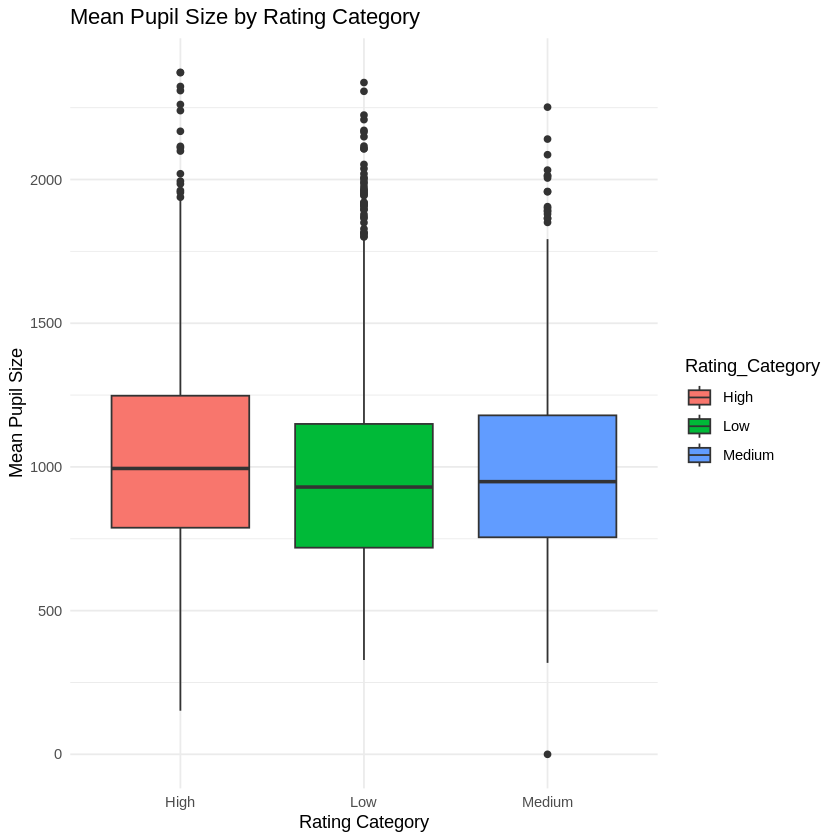

In [11]:
ggplot(df_eye, aes(x = Rating_Category, y = PupilSize_Mean, fill = Rating_Category)) +
  geom_boxplot() +
  labs(title = "Mean Pupil Size by Rating Category", y = "Mean Pupil Size", x = "Rating Category") +
  theme_minimal()

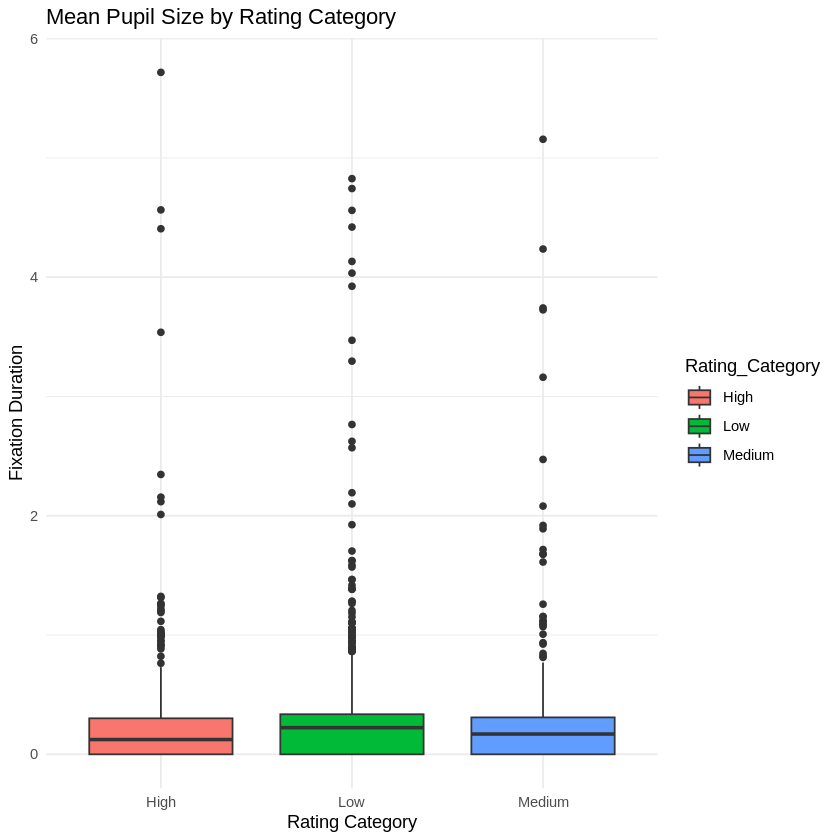

In [12]:
ggplot(df_eye, aes(x = Rating_Category, y = fixationDur_mean, fill = Rating_Category)) +
  geom_boxplot() +
  labs(title = "Mean Pupil Size by Rating Category", y = "Fixation Duration", x = "Rating Category") +
  theme_minimal()

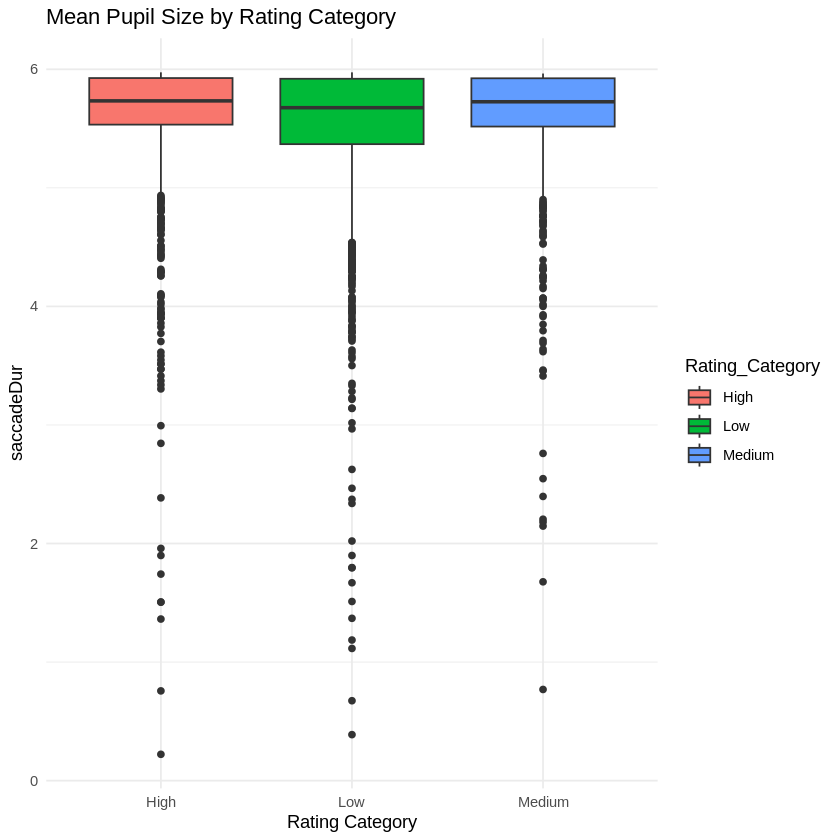

In [13]:
ggplot(df_eye, aes(x = Rating_Category, y = saccadeDur, fill = Rating_Category)) +
  geom_boxplot() +
  labs(title = "Mean Pupil Size by Rating Category", y = "saccadeDur", x = "Rating Category") +
  theme_minimal()

## Stats

In [14]:
library(lme4)
library(lmerTest)  
library(MuMIn)     



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




ERROR: Error in library(MuMIn): there is no package called ‘MuMIn’


In [15]:
df_eye$Rating_Category <- as.factor(df_eye$Rating_Category)
df_eye$Condition <- as.factor(df_eye$Condition)


In [16]:
m1 <- lmer(IPA_Mean ~ Rating_Category + (1 | Condition) + (1 | TaskCount) + (1 | ParticipantID), 
                   data = df_eye)


m2 <- lmer(IPA_Mean ~ Rating_Category + (1 | Condition) + (1 | ParticipantID), 
                           data = df_eye)

m3 <- lmer(IPA_Mean ~ Rating_Category + (1 | TaskCount) + (1 | ParticipantID), 
                           data = df_eye)

m4 <- lmer(IPA_Mean ~ Rating_Category + (1 | ParticipantID), 
                           data = df_eye)

BIC(m1, m2, m3, m4)


boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



,df,BIC
,<dbl>,<dbl>
m1,7,9462.897
m2,6,9454.603
m3,6,9454.966
m4,5,9446.672


In [17]:
anova(m1, m2, m3, m4)


refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m4,5,9401.091,9432.561,-4695.545,9391.091,NA,NA,NA
m2,6,9402.742,9440.507,-4695.371,9390.742,0.348396,1,0.5550225
m3,6,9403.091,9440.855,-4695.545,9391.091,0.000000,0,NA
m1,7,9404.742,9448.801,-4695.371,9390.742,0.348396,1,0.5550225


In [18]:
summary(m4)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: IPA_Mean ~ Rating_Category + (1 | ParticipantID)
   Data: df_eye

REML criterion at convergence: 9405.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0866 -0.6280 -0.0815  0.6200  6.3968 

Random effects:
 Groups        Name        Variance Std.Dev.
 ParticipantID (Intercept) 0.07557  0.2749  
 Residual                  0.60311  0.7766  
Number of obs: 4000, groups:  ParticipantID, 20

Fixed effects:
                       Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)           2.273e+00  6.509e-02 2.207e+01  34.921  < 2e-16 ***
Rating_CategoryLow    7.544e-02  2.961e-02 3.997e+03   2.548  0.01087 *  
Rating_CategoryMedium 1.007e-01  3.377e-02 3.992e+03   2.982  0.00288 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Rtn_CL
Rtng_CtgryL -0.247       
Rtng_CtgryM -0.210  0.464

In [19]:
m1 <- lmer(PupilSize_Mean ~ Rating_Category + (1 | Condition) + (1 | TaskCount) + (1 | ParticipantID), 
                   data = df_eye)


m2 <- lmer(PupilSize_Mean ~ Rating_Category + (1 | Condition) + (1 | ParticipantID), 
                           data = df_eye)

m3 <- lmer(PupilSize_Mean ~ Rating_Category + (1 | TaskCount) + (1 | ParticipantID), 
                           data = df_eye)

m4 <- lmer(PupilSize_Mean ~ Rating_Category + (1 | ParticipantID), 
                           data = df_eye)


In [20]:
BIC(m1, m2, m3, m4)


,df,BIC
,<dbl>,<dbl>
m1,7,53971.78
m2,6,53975.42
m3,6,54278.42
m4,5,54277.51


In [22]:
summary(m1)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
PupilSize_Mean ~ Rating_Category + (1 | Condition) + (1 | TaskCount) +  
    (1 | ParticipantID)
   Data: df_eye

REML criterion at convergence: 53913.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.0879 -0.5617 -0.0389  0.5138  5.9032 

Random effects:
 Groups        Name        Variance Std.Dev.
 TaskCount     (Intercept)   801.8   28.32  
 ParticipantID (Intercept) 74418.7  272.80  
 Condition     (Intercept)  4191.6   64.74  
 Residual                  39558.7  198.89  
Number of obs: 4000, groups:  TaskCount, 200; ParticipantID, 20; Condition, 20

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           1019.815     62.974   21.393  16.194 1.74e-13 ***
Rating_CategoryLow     -28.354      7.799 3962.879  -3.636 0.000281 ***
Rating_CategoryMedium  -25.306      8.804 3954.108  -2.874 0.004071 ** 
---
Signif. codes:  0 ‘*

## Fixation

In [29]:
m1 <- lmer(fixationDur_mean ~ Rating_Category + (1 | Condition) + (1 | TaskCount) + (1 | ParticipantID), 
                   data = df_eye)


m2 <- lmer(fixationDur_mean ~ Rating_Category + (1 | Condition) + (1 | ParticipantID), 
                           data = df_eye)

m3 <- lmer(fixationDur_mean ~ Rating_Category + (1 | TaskCount) + (1 | ParticipantID), 
                           data = df_eye)

m4 <- lmer(fixationDur_mean ~ Rating_Category + (1 | ParticipantID), 
                           data = df_eye)
BIC(m1, m2, m3, m4)


boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



,df,BIC
,<dbl>,<dbl>
m1,7,2837.324
m2,6,2829.030
m3,6,2838.311
m4,5,2830.016


In [35]:
summary(m1)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
fixationDur_mean ~ Rating_Category + (1 | Condition) + (1 | TaskCount) +  
    (1 | ParticipantID)
   Data: df_eye

REML criterion at convergence: 2779.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8068 -0.3837 -0.1173  0.1882 15.3274 

Random effects:
 Groups        Name        Variance  Std.Dev.
 TaskCount     (Intercept) 0.0000000 0.00000 
 ParticipantID (Intercept) 0.0276051 0.16615 
 Condition     (Intercept) 0.0007691 0.02773 
 Residual                  0.1141246 0.33782 
Number of obs: 4000, groups:  TaskCount, 200; ParticipantID, 20; Condition, 20

Fixed effects:
                       Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)           1.871e-01  3.882e-02 2.168e+01   4.820 8.46e-05 ***
Rating_CategoryLow    7.781e-02  1.303e-02 3.881e+03   5.971 2.57e-09 ***
Rating_CategoryMedium 4.249e-02  1.478e-02 3.977e+03   2.875  0.00406 ** 
---
Signif

In [26]:
m1 <- lmer(saccadeAmp ~ Rating_Category + (1 | Condition) + (1 | TaskCount) + (1 | ParticipantID), 
                   data = df_eye)


m2 <- lmer(saccadeAmp ~ Rating_Category + (1 | Condition) + (1 | ParticipantID), 
                           data = df_eye)

m3 <- lmer(saccadeAmp ~ Rating_Category + (1 | TaskCount) + (1 | ParticipantID), 
                           data = df_eye)

m4 <- lmer(saccadeAmp ~ Rating_Category + (1 | ParticipantID), 
                           data = df_eye)
BIC(m1, m2, m3, m4)


boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



,df,BIC
,<dbl>,<dbl>
m1,7,40256.29
m2,6,40248.00
m3,6,40337.21
m4,5,40328.92


In [27]:
summary(m2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: saccadeAmp ~ Rating_Category + (1 | Condition) + (1 | ParticipantID)
   Data: df_eye

REML criterion at convergence: 40198.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0793 -0.5184 -0.0040  0.5166  6.5782 

Random effects:
 Groups        Name        Variance Std.Dev.
 Condition     (Intercept)    45.22   6.725 
 ParticipantID (Intercept) 11310.66 106.352 
 Residual                   1311.17  36.210 
Number of obs: 3996, groups:  Condition, 20; ParticipantID, 20

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)            696.542     23.850   19.198  29.205  < 2e-16 ***
Rating_CategoryLow       3.876      1.407 3974.483   2.755  0.00589 ** 
Rating_CategoryMedium    4.521      1.591 3969.772   2.842  0.00451 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Int

In [37]:
m1 <- lmer(saccadeFreq ~ Rating_Category + (1 | Condition) + (1 | TaskCount) + (1 | ParticipantID), 
                   data = df_eye)


m2 <- lmer(saccadeFreq ~ Rating_Category + (1 | Condition) + (1 | ParticipantID), 
                           data = df_eye)

m3 <- lmer(saccadeFreq ~ Rating_Category + (1 | TaskCount) + (1 | ParticipantID), 
                           data = df_eye)

m4 <- lmer(saccadeFreq ~ Rating_Category + (1 | ParticipantID), 
                           data = df_eye)
BIC(m1, m2, m3, m4)


boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



,df,BIC
,<dbl>,<dbl>
m1,7,52360.48
m2,6,52352.18
m3,6,52356.23
m4,5,52347.94


In [39]:
summary(m1)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: saccadeFreq ~ Rating_Category + (1 | Condition) + (1 | TaskCount) +  
    (1 | ParticipantID)
   Data: df_eye

REML criterion at convergence: 52302.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-10.0802  -0.1789   0.1209   0.4254   2.0470 

Random effects:
 Groups        Name        Variance Std.Dev.
 TaskCount     (Intercept)     0.0    0.00  
 ParticipantID (Intercept) 10668.2  103.29  
 Condition     (Intercept)   110.7   10.52  
 Residual                  27409.2  165.56  
Number of obs: 4000, groups:  TaskCount, 200; ParticipantID, 20; Condition, 20

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           1897.933     23.665   20.401  80.200  < 2e-16 ***
Rating_CategoryLow     -40.217      6.374 3772.213  -6.310 3.12e-10 ***
Rating_CategoryMedium  -19.522      7.235 3954.886  -2.698    0.007 ** 
---
Signif. codes: